In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("parkinsons_2.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(195, 8)

In [5]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),NHR,HNR,status,DFA,spread
0,119.992,157.302,74.997,0.02211,21.033,1,0.815285,0.266482
1,122.400,148.650,113.819,0.01929,19.085,1,0.819521,0.335590
2,116.682,131.111,111.555,0.01309,20.651,1,0.825288,0.311173
3,116.676,137.871,111.366,0.01353,20.644,1,0.819235,0.334147
4,116.014,141.781,110.655,0.01767,19.649,1,0.823484,0.234513


In [6]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),NHR,HNR,status,DFA,spread
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.024847,21.885974,0.753846,0.718099,0.226510
std,41.390065,91.491548,43.521413,0.040418,4.425764,0.431878,0.055336,0.083406
min,88.333000,102.145000,65.476000,0.000650,8.441000,0.000000,0.574282,0.006274
25%,117.572000,134.862500,84.291000,0.005925,19.198000,1.000000,0.674758,0.174351
50%,148.790000,175.829000,104.315000,0.011660,22.085000,1.000000,0.722254,0.218885
75%,182.769000,224.205500,140.018500,0.025640,25.075500,1.000000,0.761881,0.279234
max,260.105000,592.030000,239.170000,0.314820,33.047000,1.000000,0.825288,0.450493


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MDVP:Fo(Hz)   195 non-null    float64
 1   MDVP:Fhi(Hz)  195 non-null    float64
 2   MDVP:Flo(Hz)  195 non-null    float64
 3   NHR           195 non-null    float64
 4   HNR           195 non-null    float64
 5   status        195 non-null    int64  
 6   DFA           195 non-null    float64
 7   spread        195 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.3 KB


In [8]:
data.sample(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),NHR,HNR,status,DFA,spread
174,117.004,144.466,99.923,0.00590,25.445,0,0.756482,0.229298
136,113.400,133.344,107.816,0.02278,19.013,1,0.708144,0.300067
72,120.080,139.710,111.208,0.00442,25.742,1,0.762959,0.329066
150,186.695,211.961,149.442,0.10952,12.529,1,0.762726,0.340256
163,112.150,131.669,97.527,0.01435,21.219,1,0.673086,0.184896


In [9]:
data.isnull().sum()

MDVP:Fo(Hz)     0
MDVP:Fhi(Hz)    0
MDVP:Flo(Hz)    0
NHR             0
HNR             0
status          0
DFA             0
spread          0
dtype: int64

In [10]:
print(data.corr()["status"].abs().sort_values(ascending=False))

status          1.000000
spread          0.454842
MDVP:Fo(Hz)     0.383535
MDVP:Flo(Hz)    0.380200
HNR             0.361515
DFA             0.231739
NHR             0.189429
MDVP:Fhi(Hz)    0.166136
Name: status, dtype: float64


# Exploratory Data Analysis (EDA)

In [11]:
y = data["status"]

1    147
0     48
Name: status, dtype: int64


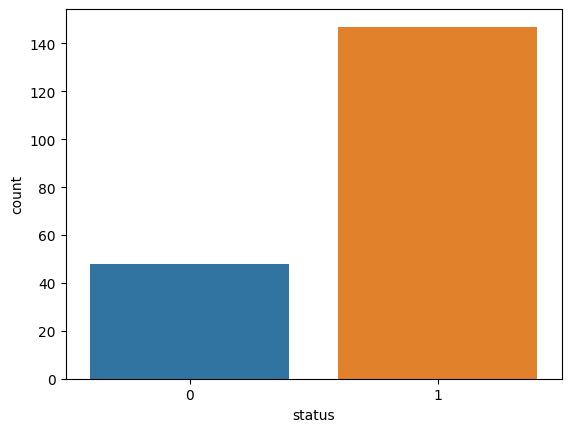

In [12]:
ax = sns.countplot(data["status"])
target_temp = data.status.value_counts()
print(target_temp)

In [13]:
print("Percentage of patience without parkinsons problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with parkinsons problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without parkinsons problems: 15.84
Percentage of patience with parkinsons problems: 48.51


In [14]:
from sklearn.model_selection import train_test_split

predictors = data.drop(["status"],axis=1)
target = data["status"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=2)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 156 records and Testing features have 39 records.


### Here 0 is female and 1 is male patients

In [15]:
X_train.shape

(156, 7)

In [16]:
X_test.shape

(39, 7)

In [17]:
Y_train.shape

(156,)

In [18]:
Y_test.shape

(39,)

## importing Accuracy score

In [19]:
from sklearn.metrics import accuracy_score

# Modelling and predicting with Machine Learning
The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric. I have chosen several algorithms typical for solving supervised learning problems throughout classification methods.

First of all, let's equip ourselves with a handy tool that benefits from the cohesion of SciKit Learn library and formulate a general function for training our models. The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff).

In [20]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

# Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1]


In [22]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 82.05 %


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,y_pred_lr))
print(classification_report(Y_test,y_pred_lr))
print("Accuracy:",accuracy_score(Y_test, y_pred_lr))

[[ 3  5]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.85      0.94      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.66      0.68        39
weighted avg       0.80      0.82      0.80        39

Accuracy: 0.8205128205128205


In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 81.41%
Test accuracy: 82.05%


Best ACCURACY possible using Logistic regression

In [25]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(X_test, Y_test)
#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)

0.8461538461538461

# Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
matrix= confusion_matrix(Y_test, y_pred_lr)

<Axes: >

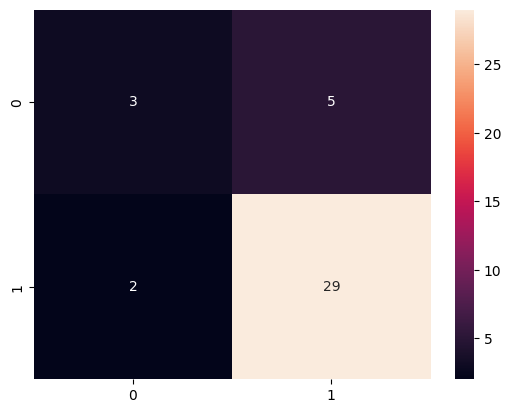

In [28]:
sns.heatmap(matrix,annot = True, fmt = "d")

fmt = d is format = default

# precision Score

In [29]:
from sklearn.metrics import precision_score

In [30]:
precision = precision_score(Y_test, y_pred_lr)

In [31]:
print("Precision: ",precision)

Precision:  0.8529411764705882


# Recall

In [32]:
from sklearn.metrics import recall_score

In [33]:
recall = recall_score(Y_test, y_pred_lr)

In [34]:
print("Recall is: ",recall)

Recall is:  0.9354838709677419


# F-Score

balance of precision and recall score

In [35]:
print((2*precision*recall)/(precision+recall))

0.8923076923076922


performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

-Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

-F-score: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of our case study:

TP = True positive (has heart disease). TN = True negative (has no heart disease). FP = False positive (has no heart disease) FN = False negative (has heart disease)

# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 80.77%
Test accuracy: 74.36%
[1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0
 1 1]


In [37]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 74.36 %


In [38]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 80.77%
Test accuracy: 74.36%


## confusion matrix of Naive Bayes

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
matrix= confusion_matrix(Y_test, y_pred_nb)

<Axes: >

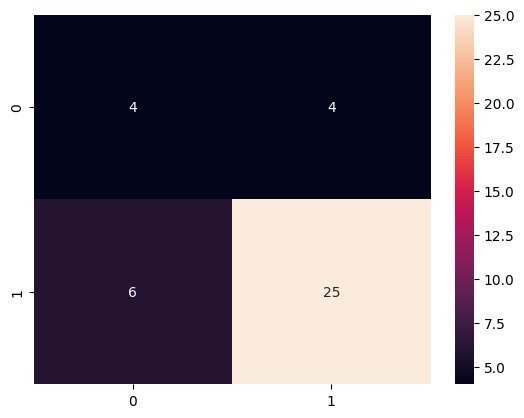

In [41]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [42]:
from sklearn.metrics import precision_score

In [43]:
precision = precision_score(Y_test, y_pred_nb)

In [44]:
print("Precision: ",precision)

Precision:  0.8620689655172413


# recall

In [45]:
from sklearn.metrics import recall_score

In [46]:
recall = recall_score(Y_test, y_pred_nb)

In [47]:
print("Recall is: ",recall)

Recall is:  0.8064516129032258


# f score

In [48]:
print((2*precision*recall)/(precision+recall))

0.8333333333333334


# KNN(K Nearest Neighbors)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 86.54%
Test accuracy: 79.49%
[1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0
 1 1]


In [50]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 79.49 %


In [51]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 87.18%
Test accuracy: 74.36%


Let's see if KNN can perform even better by trying different 'n_neighbours' inputs.

In [52]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 84.62%
n_neigbors = 2
Train accuracy: 91.03%
Test accuracy: 74.36%
n_neigbors = 3
Train accuracy: 91.67%
Test accuracy: 76.92%
n_neigbors = 4
Train accuracy: 89.10%
Test accuracy: 74.36%
n_neigbors = 5
Train accuracy: 87.18%
Test accuracy: 74.36%
n_neigbors = 6
Train accuracy: 89.10%
Test accuracy: 74.36%
n_neigbors = 7
Train accuracy: 88.46%
Test accuracy: 79.49%
n_neigbors = 8
Train accuracy: 86.54%
Test accuracy: 79.49%
n_neigbors = 9
Train accuracy: 87.18%
Test accuracy: 84.62%


It turns out that value of n_neighbours (8) is optimal.

## Confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
matrix= confusion_matrix(Y_test, y_pred_knn)

<Axes: >

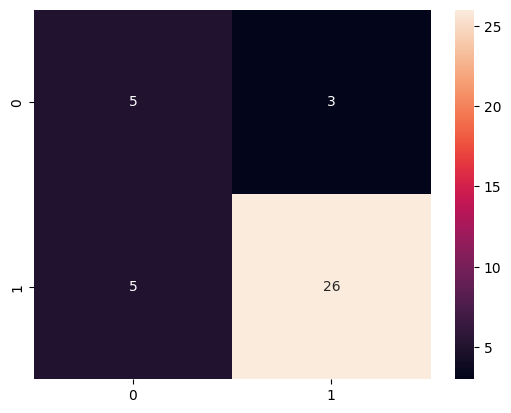

In [55]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [56]:
from sklearn.metrics import precision_score

In [57]:
precision = precision_score(Y_test, y_pred_knn)

In [58]:
print("Precision: ",precision)

Precision:  0.896551724137931


# recall

In [59]:
from sklearn.metrics import recall_score

In [60]:
recall = recall_score(Y_test, y_pred_knn)

In [61]:
print("Recall is: ",recall)

Recall is:  0.8387096774193549


# f score

In [62]:
print((2*precision*recall)/(precision+recall))

0.8666666666666666


# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0
 1 1]


In [64]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 89.74 %


In [65]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.897


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [66]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.923
Accuracy on test set: 0.897


## Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
matrix= confusion_matrix(Y_test, y_pred_dt)

<Axes: >

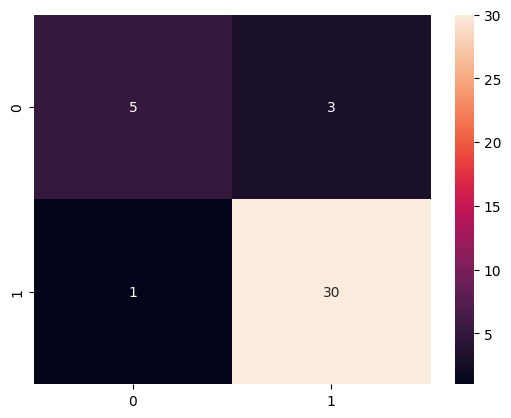

In [69]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [70]:
from sklearn.metrics import precision_score

In [71]:
precision = precision_score(Y_test, y_pred_dt)

In [72]:
print("Precision: ",precision)

Precision:  0.9090909090909091


# recall

In [73]:
from sklearn.metrics import recall_score

In [74]:
recall = recall_score(Y_test, y_pred_dt)

In [75]:
print("Recall is: ",recall)

Recall is:  0.967741935483871


# f score

In [76]:
print((2*precision*recall)/(precision+recall))

0.9374999999999999


# Final Score

In [77]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes' ]

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), 
        GaussianNB()]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

In [78]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.846154
Decision Trees,0.897436
Logistic Regression,0.820513
Naive Bayes,0.743590


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

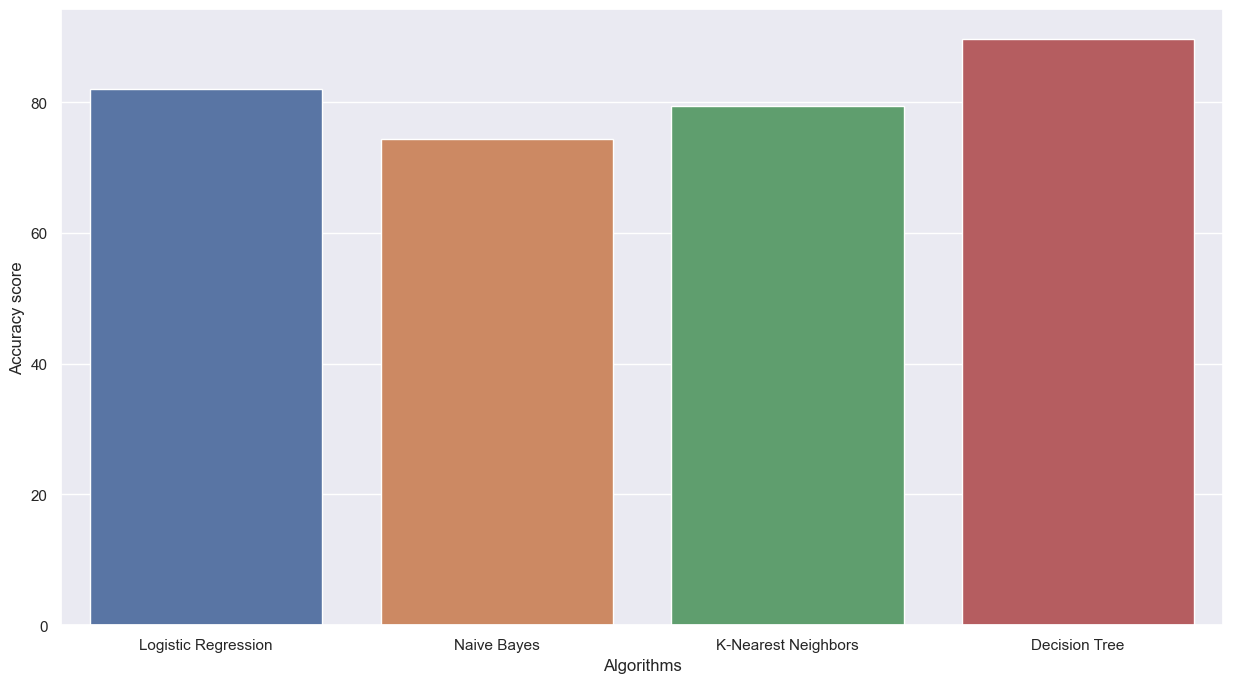

In [79]:
scores = [score_lr,score_nb,score_knn,score_dt]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree"] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [80]:
import pickle
filename = 'parkinson_trained_model.pkl'
pickle.dump(tree1,open(filename,'wb'))


In [81]:
loaded_model = pickle.load(open('parkinson_trained_model.pkl','rb'))

In [82]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),NHR,HNR,status,DFA,spread
0,119.992,157.302,74.997,0.02211,21.033,1,0.815285,0.266482
1,122.400,148.650,113.819,0.01929,19.085,1,0.819521,0.335590
2,116.682,131.111,111.555,0.01309,20.651,1,0.825288,0.311173
3,116.676,137.871,111.366,0.01353,20.644,1,0.819235,0.334147
4,116.014,141.781,110.655,0.01767,19.649,1,0.823484,0.234513


In [83]:
# case 1

In [84]:
y = data.loc[data['status']==1]
y.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),NHR,HNR,status,DFA,spread
0,119.992,157.302,74.997,0.02211,21.033,1,0.815285,0.266482
1,122.400,148.650,113.819,0.01929,19.085,1,0.819521,0.335590
2,116.682,131.111,111.555,0.01309,20.651,1,0.825288,0.311173
3,116.676,137.871,111.366,0.01353,20.644,1,0.819235,0.334147
4,116.014,141.781,110.655,0.01767,19.649,1,0.823484,0.234513


In [85]:
input_data = (119,157,74,0.02211,21.033,0.815285,0.266482)
#chaning the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
pred = loaded_model.predict(input_data_reshaped)
print(pred)
if(pred[0] == 0):
    print("The person no need to worry")
else:
    print("The person need to consult a doctor and take necessary precautions")

[1]
The person need to consult a doctor and take necessary precautions


In [86]:
y = data.loc[data['status']==0]
y.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),NHR,HNR,status,DFA,spread
30,197.076,206.896,192.055,0.00339,26.775,0,0.741367,0.177551
31,199.228,209.512,192.091,0.00167,30.940,0,0.742055,0.173319
32,198.383,215.203,193.104,0.00119,30.775,0,0.738703,0.175181
33,202.266,211.604,197.079,0.00072,32.684,0,0.742133,0.178540
34,203.184,211.526,196.160,0.00065,33.047,0,0.741899,0.163519


In [87]:
# Case 2

In [88]:
input_data = (197.076,206.896,192,0.00339,26.775,0.74,0.177)
#chaning the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
pred = loaded_model.predict(input_data_reshaped)
print(pred)
if(pred[0] == 0):
    print("The User no need to worry")
else:
    print("The User need to consult a doctor and take necessary precautions")


[0]
The User no need to worry
